In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | Four very pleasant, on time..."
1,Not Verified | We travel extensively over 25...
2,✅ Trip Verified | Flight delayed an hour due ...
3,✅ Trip Verified | A very full flight made Pre...
4,✅ Trip Verified | The worst airline I’ve ever ...


In [4]:
df

,reviews
0,"✅ Trip Verified | Four very pleasant, on time..."
1,Not Verified | We travel extensively over 25...
2,✅ Trip Verified | Flight delayed an hour due ...
3,✅ Trip Verified | A very full flight made Pre...
4,✅ Trip Verified | The worst airline I’ve ever ...
...,...
995,✅ Trip Verified | I was seated right next to t...
996,"✅ Trip Verified | Flight was OK, minor delay ..."
997,✅ Trip Verified | \r\nGatwick to Barbados ret...
998,✅ Trip Verified | Marseille to London. I am g...


In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [6]:
df

,reviews
0,"Four very pleasant, on time flights with fri..."
1,We travel extensively over 25 years and ten...
2,Flight delayed an hour due to bad weather ar...
3,A very full flight made Premium Economy feel...
4,The worst airline I’ve ever flown. Could not ...
...,...
995,I was seated right next to the galley and lav...
996,"Flight was OK, minor delay didn't both me. W..."
997,\r\nGatwick to Barbados return. I normally t...
998,Marseille to London. I am generally annoyed ...


In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frien...
1,We travel extensively over 25 years and ten...,We travel extensively over years and tend to ...
2,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather aro...
3,A very full flight made Premium Economy feel...,A very full flight made Premium Economy feel ...
4,The worst airline I’ve ever flown. Could not ...,The worst airline I ve ever flown Could not c...


In [8]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


In [9]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frien...,"[(Four, None), (pleasant, a), (time, n), (flig..."
1,We travel extensively over 25 years and ten...,We travel extensively over years and tend to ...,"[(travel, v), (extensively, r), (years, n), (t..."
2,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather aro...,"[(Flight, n), (delayed, v), (hour, n), (due, a..."
3,A very full flight made Premium Economy feel...,A very full flight made Premium Economy feel ...,"[(full, a), (flight, n), (made, v), (Premium, ..."
4,The worst airline I’ve ever flown. Could not ...,The worst airline I ve ever flown Could not c...,"[(worst, a), (airline, n), (ever, r), (flown, ..."


In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frien...,"[(Four, None), (pleasant, a), (time, n), (flig...",Four pleasant time flight friendly helpful s...
1,We travel extensively over 25 years and ten...,We travel extensively over years and tend to ...,"[(travel, v), (extensively, r), (years, n), (t...",travel extensively year tend use BA regular ...
2,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather aro...,"[(Flight, n), (delayed, v), (hour, n), (due, a...",Flight delay hour due bad weather around JFK...
3,A very full flight made Premium Economy feel...,A very full flight made Premium Economy feel ...,"[(full, a), (flight, n), (made, v), (Premium, ...",full flight make Premium Economy feel little...
4,The worst airline I’ve ever flown. Could not ...,The worst airline I ve ever flown Could not c...,"[(worst, a), (airline, n), (ever, r), (flown, ...",bad airline ever fly Could check flight open...


In [11]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"Four very pleasant, on time flights with fri...",Four pleasant time flight friendly helpful s...
1,We travel extensively over 25 years and ten...,travel extensively year tend use BA regular ...
2,Flight delayed an hour due to bad weather ar...,Flight delay hour due bad weather around JFK...
3,A very full flight made Premium Economy feel...,full flight make Premium Economy feel little...
4,The worst airline I’ve ever flown. Could not ...,bad airline ever fly Could check flight open...
...,...,...
995,I was seated right next to the galley and lav...,seat right next galley lavatory aisle safety...
996,"Flight was OK, minor delay didn't both me. W...",Flight OK minor delay astonish wait hour dro...
997,\r\nGatwick to Barbados return. I normally t...,Gatwick Barbados return normally travel BA l...
998,Marseille to London. I am generally annoyed ...,Marseille London generally annoy quality ser...


In [15]:
pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ----------------------------------- ---- 112.6/126.0 kB 3.2 MB/s eta 0:00:01
   ----------------------------------- ---- 112.6/126.0 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------  122.9/126.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  122.9/126.0 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 615.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"Four very pleasant, on time flights with fri...",Four very pleasant on time flights with frien...,"[(Four, None), (pleasant, a), (time, n), (flig...",Four pleasant time flight friendly helpful s...,0.5759,Positive
1,We travel extensively over 25 years and ten...,We travel extensively over years and tend to ...,"[(travel, v), (extensively, r), (years, n), (t...",travel extensively year tend use BA regular ...,-0.6549,Negative
2,Flight delayed an hour due to bad weather ar...,Flight delayed an hour due to bad weather aro...,"[(Flight, n), (delayed, v), (hour, n), (due, a...",Flight delay hour due bad weather around JFK...,0.9613,Positive
3,A very full flight made Premium Economy feel...,A very full flight made Premium Economy feel ...,"[(full, a), (flight, n), (made, v), (Premium, ...",full flight make Premium Economy feel little...,0.8885,Positive
4,The worst airline I’ve ever flown. Could not ...,The worst airline I ve ever flown Could not c...,"[(worst, a), (airline, n), (ever, r), (flown, ...",bad airline ever fly Could check flight open...,-0.8230,Negative


In [17]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    472
Negative    419
Neutral     109
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x2185e6d2190>,
 [Text(0.09663630635705908, 1.0957469709260732, 'Positive'),
  Text(-0.458955967806137, -0.9996796584982273, 'Negative'),
  Text(1.271619409691705, -0.45330351520291584, 'Neutral')],
 [Text(0.05271071255839586, 0.5976801659596762, '47.2%'),
  Text(-0.25033961880334743, -0.5452798137263057, '41.9%'),
  Text(0.8006492579540364, -0.28541332438702105, '10.9%')])

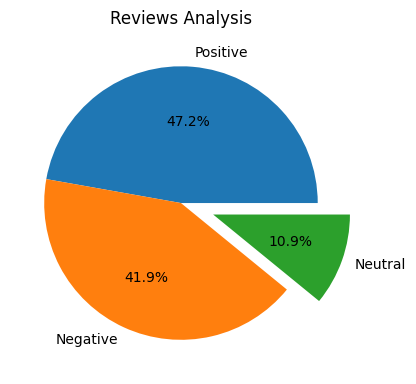

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [19]:
df.to_csv("BA_reviews.csv")

In [21]:
pip install wordcloud matplotlib numpy


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 653.6 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 975.2 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/300.2 kB 1.1 MB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.2 kB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.

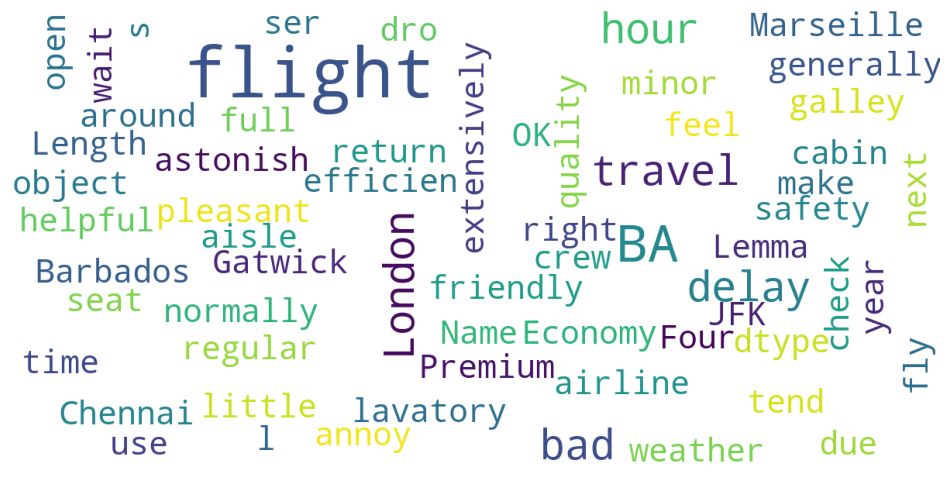

In [22]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)